In [ ]:
# Import Tensorflow
import tensorflow as tf
import numpy as np


### Step 1 : Understanding Tensors

"tensor' - think of it like a multi-dimensional array(similiar to a list or matrix in Python)

Why? Tensors are the basic units of data that flow through models the "input" and "output" of your neural network.

In [ ]:
tensor = tf.constant([[1,2],[3,4]])
print(tensor)

### Build a Simple Model

Why? each step means

*Sequential *— means layers will go in order.
Dense(units=1) — creates one layer with one neuron (like one formula: y = mx + b).

*Optimizer*='sgd' — this helps the model adjust its weights (Stochastic Gradient Descent).

*loss*='mean_squared_error' — tells the model how far off it is from the real answer and guides corrections.

*fit* — actually trains the model using the data.
predict — once trained, it can predict answers for new values.

In [ ]:


# Sample data = y = 2x + 1
X = np.array([1,2,3,4,5,],dtype=float)
Y = np.array([3,5,7,9,11],dtype=float)

# Build the model
test_model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1,input_shape=[1])
])

# Compile the model (Define how it learn)
test_model.compile(optimizer='sgd',loss='mean_squared_error')

# Train the model
test_model.fit(X,Y,epochs=500)


# Test the model
print(test_model.predict(np.array([6.0]))) # Convert the input to a NumPy array


### Step 2 : Understanding the Results

After training, if you input *6*, the model should predict close to 13( since y = 2 * 6 + 1)

**Result** : 13.078117

Why? this shows the model learned the pattern

### Step 2a : Extact Weights and Biases

Every neuron in a "Dense" layer has:

*   Weights (Multipliers)
*   Bias (A shift in the Line)


Weights: [[2.0326898]]
Biases: [0.88197905]


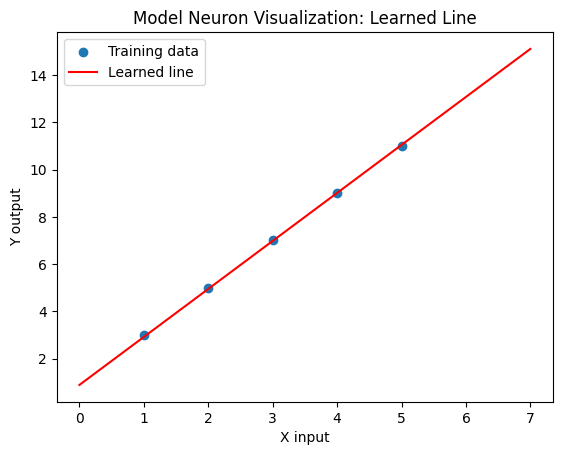

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Print weights and biases from the first (and only) layer:
weights, biases = test_model.layers[0].get_weights()

print("Weights:", weights)
print("Biases:", biases)

# Plot original data points
plt.scatter(X, Y, label='Training data')

# Plot the model's prediction line
x_line = np.linspace(0, 7, 100)
y_line = weights[0][0] * x_line + biases[0]
plt.plot(x_line, y_line, color='red', label='Learned line')

plt.legend()
plt.title("Model Neuron Visualization: Learned Line")
plt.xlabel("X input")
plt.ylabel("Y output")
plt.show()

### Step 2b : Plot the learned Line vs. The Data
 Why?
 This shows how the neurons "decided" to fit the line throught the data

#### What is an Optimizer?
*    After each guess the model checks how wrong it was (using the loss function) and then uese the optimizer to adjust itself
*   `sgd`(Stochastic Gradient Descent) is a simple optimizer - it moves in smalls steps towards better guesses
*   Other optimiizer like `adam` are smarter and adjust learning speed dynamically

Example difference:

`sgd` is like adjusting weights slowly and steadily
`adam`is like adjusting weights more intelligently, speeding up when confident, slowing down when uncertain



#### What is a Loss Function

*   This measures how far off the model's predicitions are from the real values
*  `mean_squared_error` is common for regression - it squarees the errors so bigger mistakes are penalized more.

In simple terms: it like telling the model, "You missed by this much!"- and it learns to reduce that miss.

## Step 3 : Adding More Complexity --Multiple Layers

Building a slightly more complex neural network with multiple layers

Why?

*   More Layers allow the model to learn more complex patterns
*   `activation='relu'` means if the neuron's output is negative, it changes it to zero (introducing non-linearity)



In [ ]:
test_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1], activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
])

test_model.compile(optimizer='adam',loss='mean_squared_error')
test_model.fit(X,Y,epochs=500)

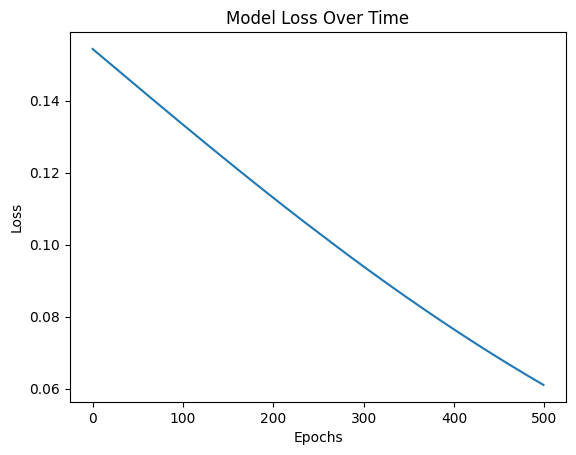

In [ ]:
import matplotlib.pyplot as plt

history = test_model.fit(X, Y, epochs=500, verbose=0)

plt.plot(history.history['loss'])
plt.title('Model Loss Over Time')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

Why?
*   Visualizing loss helps you see if the model is improving or if it's stuck.

## Improving Accuracy of the Model

*    Why: The more diverse and larger your dataset, the better the model can learn patterns without overfitting or guessing
*     Example: if your current dataset has just 5 points, try giving it 50 or 500 possible.
*    If you don't have more data, you can gnerate synthetic data if it makes sense( like random samples based on known distributions)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X.reshape(-1,1))


 Instead of using sgd, try adam or rmsprop. They adapt the learning rate automatically and often result in faster, more accurate training.


 You can experiment with different learning_rate values — common ranges: 0.001 to 0.01.

In [ ]:
test_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mean_squared_error')

In [ ]:
test_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, input_shape=[1], activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=20)
test_model.fit(X, Y, epochs=1000, callbacks=[early_stop])


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_shape=[1], activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


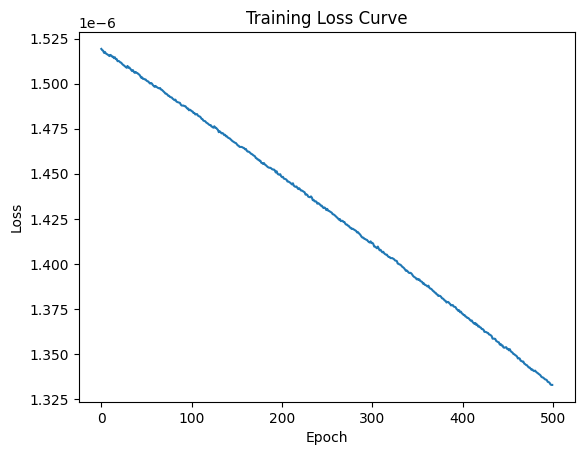

In [ ]:
history = test_model.fit(X, Y, epochs=500, verbose=0)
plt.plot(history.history['loss'])
plt.title("Training Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


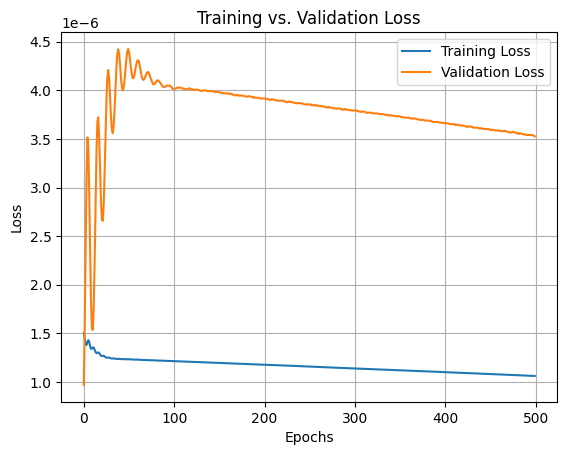

In [ ]:
history = test_model.fit(X, Y, epochs=500, validation_split=0.2, verbose=0)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import seaborn as sns

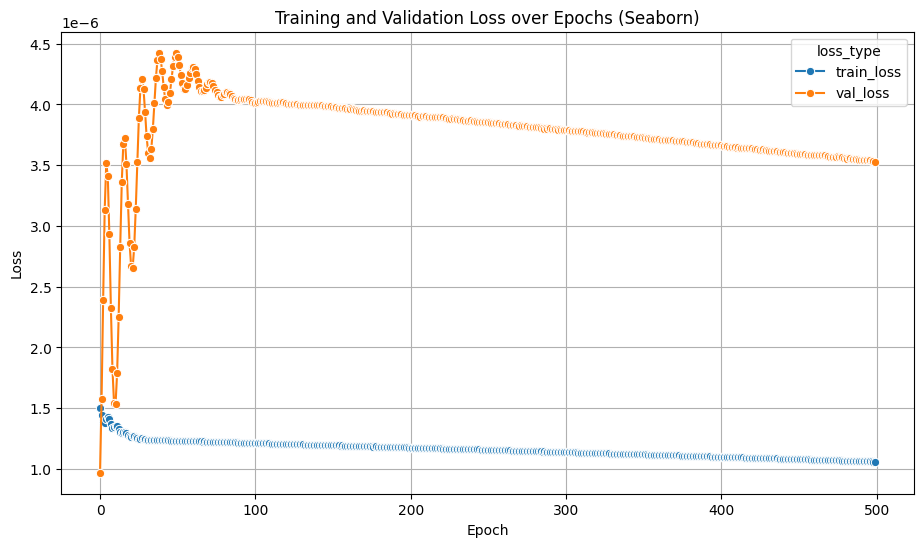

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare the data into a long DataFrame for easier plotting
df_loss = pd.DataFrame({
    'epoch': history.epoch,
    'train_loss': history.history['loss'],
    'val_loss': history.history.get('val_loss')  # Will be None if you didn’t use validation
})

# Melt the dataframe to tidy format for seaborn
loss_long = df_loss.melt(id_vars=['epoch'],
                         value_vars=['train_loss', 'val_loss'],
                         var_name='loss_type',
                         value_name='loss_value')

# Plot using seaborn lineplot
plt.figure(figsize=(11, 6))
sns.lineplot(data=loss_long, x='epoch', y='loss_value', hue='loss_type', marker='o')

plt.title('Training and Validation Loss over Epochs (Seaborn)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()
